In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
%matplotlib inline

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PIL import Image
import re 
from textblob import TextBlob
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
stop = stopwords.words('english')


In [59]:
df_tweet = pd.read_csv("Tweet.csv")

In [61]:
for i in range(100):
    print(df_tweet['body'][i])

lx21 made $10,008  on $AAPL -Check it out! http://profit.ly/1MnD8s?aff=202 Learn #howtotrade http://bit.ly/1c1NljX $EXE $WATT $IMRS $CACH $GMO
Insanity of today weirdo massive selling. $aapl bid up 45 cents after hours after non stop selling in trading hours
S&P100 #Stocks Performance $HD $LOW $SBUX $TGT $DVN $IBM $AMZN $F $APA $GM $MS $HAL $DIS $MCD $BMY $XOM  more@ http://12Stocks.com/sp100
$GM $TSLA: Volkswagen Pushes 2014 Record Recall Tally Higher https://pic.twitter.com/WIIc1lW7hW @ProTradersNews http://growword.com/2015/01/01/0246.html… @theferrarifan
Swing Trading: Up To 8.91% Return In 14 Days http://ow.ly/GDks0 #swingtrading #forecast #techstock $MWW $AAPL $TSLA
Swing Trading: Up To 8.91% Return In 14 Days http://ow.ly/GDkrL #swingtrading #forecast #techstock $MWW $AAPL $TSLA
Swing Trading: Up To 8.91% Return In 14 Days http://ow.ly/GDkrW #swingtrading #forecast #techstock $MWW $AAPL $TSLA
Swing Trading: Up To 8.91% Return In 14 Days http://ow.ly/GDkrN #swingtrading #forecast

# Crawl data from twitter 

In [2]:
# Authentication
consumer_key = '0C1jF6EzRx6wAQqmrHU617GwS'
consumer_secret = 'bTBH11iZM7JXGw7boXn5UBAWZt63FlxISyTWxYg1FonyvknBb0'
access_token = '1623610754325950465-yIuoP9CDVnONNXjsgOfRoVforizIfx'
access_token_secret = 'Sj3sDiB1FnEqHSwlFI5IiF1r6mDlw1jBrRbL4RQfsVNfG'

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAAI4ZQEAAAAA0CuD4%2BikWrOFi7myfncjcqXq2k8%3DjhlvJW1e8IMkuYcMeeCgqxpeoR66QgUcuUWeWRzf9Fobxmbn9L'

client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [3]:
# use query to get tweets and store as pd
ticker_symbol = ['AAPL', 'GOOG', 'GOOGL', 'AMZN', 'TSLA', 'MSFT']
company_name = ['apple', 'google', 'google', 'Amazon', 'Tesla', 'Microsoft']
start_time = '2021-01-01T00:00:00Z'
end_time = '2023-03-01T00:00:00Z'
num = 8000
tweet_list = []
#search_recent_tweets
for i in range(len(ticker_symbol)):
    query = ticker_symbol[i] + ' ' + company_name[i] + ' -is:retweet lang:en'
    tweets = tweepy.Paginator(client.search_recent_tweets, query=query, 
                              tweet_fields=['author_id', 'created_at', 'public_metrics', 'lang'],
                              max_results=100).flatten(limit=num)

    for tweet in tweets:
        if 'RT' not in tweet.text and tweet.lang == 'en':
            #print(tweet.author_id)
            user_meta = client.get_user(id=tweet.author_id, user_fields=['location']).data
            #tweet_list.append([tweet.text,cleanText(tweet.text)])
            tweet_list.append([tweet.id, company_name[i], user_meta['username'], user_meta['location'], tweet.created_at, tweet.text, tweet.public_metrics['reply_count'], 
                               tweet.public_metrics['retweet_count'], tweet.public_metrics['like_count']])
            #print(tweet.text)
            #print(tweet.id)
            #print(tweet.public_metrics)
            #print(tweet.created_at)
df_tweet = pd.DataFrame(tweet_list, columns=['tweet_id', 'ticker_symbol', 'writer','location' , 'post_date',
                                             'body', 'comment_num','retweet_num', 'like_num'])
df_tweet.drop_duplicates(inplace = True)
df_tweet.head()

Rate limit exceeded. Sleeping for 818 seconds.
Rate limit exceeded. Sleeping for 819 seconds.
Rate limit exceeded. Sleeping for 794 seconds.
Rate limit exceeded. Sleeping for 795 seconds.
Rate limit exceeded. Sleeping for 795 seconds.
Rate limit exceeded. Sleeping for 790 seconds.
Rate limit exceeded. Sleeping for 792 seconds.
Rate limit exceeded. Sleeping for 795 seconds.
Rate limit exceeded. Sleeping for 821 seconds.
Rate limit exceeded. Sleeping for 821 seconds.
Rate limit exceeded. Sleeping for 820 seconds.
Rate limit exceeded. Sleeping for 819 seconds.
Rate limit exceeded. Sleeping for 819 seconds.
Rate limit exceeded. Sleeping for 821 seconds.
Rate limit exceeded. Sleeping for 820 seconds.
Rate limit exceeded. Sleeping for 818 seconds.
Rate limit exceeded. Sleeping for 820 seconds.
Rate limit exceeded. Sleeping for 822 seconds.
Rate limit exceeded. Sleeping for 820 seconds.
Rate limit exceeded. Sleeping for 821 seconds.
Rate limit exceeded. Sleeping for 822 seconds.
Rate limit ex

,tweet_id,ticker_symbol,writer,location,post_date,body,comment_num,retweet_num,like_num
0,1633088089295036416,apple,StockIlluminat1,https://discord.gg/esvFr9ud,2023-03-07 12:51:56+00:00,$AAPL - https://t.co/SdC9ITJazY - Apple Gets A...,0,0,0
1,1633088069636063234,apple,Options_Wheel,Newsletter and other links:,2023-03-07 12:51:51+00:00,AAPL: Apple Gets AI Right https://t.co/afAi59E374,0,0,0
2,1633087473457991680,apple,SeekingAlpha,"New York, NY",2023-03-07 12:49:29+00:00,$AAPL - Apple Gets AI Right. https://t.co/m1H2...,0,0,0
3,1633087051628265473,apple,CFinancialNews,"Sioux Falls, SD",2023-03-07 12:47:49+00:00,Apple $AAPL Given a $180.00 Price Target by UB...,0,0,0
4,1633087049044484096,apple,AmericanBanking,"Sioux Falls, SD",2023-03-07 12:47:48+00:00,Apple $AAPL Given a $180.00 Price Target by UB...,0,0,0


In [4]:
print(df_tweet.shape)

(19291, 9)


In [5]:
df_tweet.to_csv('raw_data_20000.csv', index= False)


# Clean data

In [6]:
def clean_text(text):
    # Removes RT
    text = re.sub('RT @\w+: ','', text)
    text = text.lower()
    
    # Removes @username from the tweet
    text = re.sub(r'(@[A-Za-z0-9_]+)', '', text)

    # Removes link
    text = re.sub('http://\S+|https://\S+', '', text)

    # Only considers string or digits or whitespace 
    text = re.sub(r'[^\w\s]', '', text)
    
    # Removes stop words 
    text_tokens = word_tokenize(text)
    text = [word for word in text_tokens if not word in stopwords.words()]
    text = ' '.join(text)
    
    # Stem the text 
    porter = PorterStemmer()
    token_words = word_tokenize(text)
    stem_sentence = []
    for word in token_words:
        stem_sentence.append(porter.stem(word))
    return ' '.join(stem_sentence)

In [7]:
# clean raw text 
df_tweet['clean_text'] = df_tweet.apply(lambda x: clean_text(x['body']), axis=1)
df_tweet.head()

,tweet_id,ticker_symbol,writer,location,post_date,body,comment_num,retweet_num,like_num,clean_text
0,1633088089295036416,apple,StockIlluminat1,https://discord.gg/esvFr9ud,2023-03-07 12:51:56+00:00,$AAPL - https://t.co/SdC9ITJazY - Apple Gets A...,0,0,0,aapl appl
1,1633088069636063234,apple,Options_Wheel,Newsletter and other links:,2023-03-07 12:51:51+00:00,AAPL: Apple Gets AI Right https://t.co/afAi59E374,0,0,0,aapl appl
2,1633087473457991680,apple,SeekingAlpha,"New York, NY",2023-03-07 12:49:29+00:00,$AAPL - Apple Gets AI Right. https://t.co/m1H2...,0,0,0,aapl appl market economi stock
3,1633087051628265473,apple,CFinancialNews,"Sioux Falls, SD",2023-03-07 12:47:49+00:00,Apple $AAPL Given a $180.00 Price Target by UB...,0,0,0,appl aapl 18000 price target ub group analyst ...
4,1633087049044484096,apple,AmericanBanking,"Sioux Falls, SD",2023-03-07 12:47:48+00:00,Apple $AAPL Given a $180.00 Price Target by UB...,0,0,0,appl aapl 18000 price target ub group analyst ...


In [141]:
df_tweet_filter = df_tweet
df_tweet_filter["tweet_activity"] = df_tweet["comment_num"] + df_tweet["like_num"] + df_tweet["retweet_num"]
df_tweet_filter = df_tweet_filter.loc[df_tweet_filter["tweet_activity"] > 0]
    

In [142]:
df_tweet_filter.head()

,tweet_id,ticker_symbol,writer,location,post_date,body,comment_num,retweet_num,like_num,clean_text,tweet_activity
9,1633084793268174848,apple,akshay_sol,🇮🇳🇦🇺🇨🇦,2023-03-07 12:38:50+00:00,"Apple (AAPL), Alphabet (GOOG), Berkshire Hatha...",1,0,0,appl aapl alphabet goog berkshir hathaway brka...,1
11,1633082476909449216,apple,Marcus_US_stock,"Tokyo-to, Japan",2023-03-07 12:29:38+00:00,Top 10 trending stocks on WallStreetBets as of...,1,0,0,top 10 trend stock wallstreetbet 7 2023 1 appl...,1
15,1633079084979830784,apple,StockMKTNewz,"New York, NY",2023-03-07 12:16:09+00:00,Apple's $AAPL iPhone 13 was the best-selling s...,6,8,48,appl aapl iphon 13 bestsel smartphon 2022 8 to...,62
17,1633078248362987520,apple,IManghaila,None,2023-03-07 12:12:50+00:00,APPLE 🍎🍏 ( AAPL) \n.It started to move march 2...,0,0,1,appl aapl start move march 2004 perfect cup ha...,1
19,1633077262261145601,apple,OptionsITrader,Hedge Fund Capital of USA,2023-03-07 12:08:55+00:00,There it is Amazon ( $AMZN ) upgrade from Gold...,0,0,2,amazon amzn upgrad goldman sach gs appl aapl u...,2


In [143]:
df_tweet_filter = df_tweet_filter.drop_duplicates(subset=['clean_text'])

In [144]:
print(df_tweet_filter.shape)

(7045, 11)


In [145]:
for name in company_name:
    company = df_tweet_filter.loc[df_tweet_filter['ticker_symbol'] == name]
    print(name, company.shape)

apple (532, 11)
google (211, 11)
google (211, 11)
Amazon (1348, 11)
Tesla (4266, 11)
Microsoft (688, 11)


In [148]:
#df_tweet_filter = df_tweet_filter.loc[(df_tweet_filter["ticker_symbol"]=='Tesla') & (df_tweet_filter["tweet_activity"] >7)]
df_tweet_filter = df_tweet_filter.drop(df_tweet_filter[(df_tweet_filter["ticker_symbol"]=='Tesla') 
                                                       & (df_tweet_filter["tweet_activity"] < 8)].index)

In [149]:
for name in company_name:
    company = df_tweet_filter.loc[df_tweet_filter['ticker_symbol'] == name]
    print(name, company.shape)

apple (532, 11)
google (211, 11)
google (211, 11)
Amazon (1348, 11)
Tesla (1491, 11)
Microsoft (688, 11)


In [150]:
print(df_tweet_filter.shape)

(4270, 11)


In [28]:
df_tweet.to_csv('clean_data_20000.csv', index= False)


In [151]:
df_tweet_filter.to_csv('fliter_data_4200.csv', index= False)

# Sentiment analysis

In [32]:
def TextBlob_subjectivity(text):
    # [0,1], 0 defines as objective and 1 defines as subjective 
    return TextBlob(text).sentiment.subjectivity

def TextBlob_polarity(text):
    # [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment
    return TextBlob(text).sentiment.polarity

def TextBlob_analysis(subject, polarity):
#     if subject < 0.1:
#         return 'neutral'
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

def Vader_analysis(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    if score['neg'] > score['pos']:
        return 'negative'
    elif score['neg'] < score['pos']:
        return 'positive'
    else:
        return 'neutral'

In [33]:
df_tweet['TextBlob_subjectivity'] = df_tweet.apply(lambda x: TextBlob_subjectivity(x['clean_text']), axis=1)
df_tweet['TextBlob_polarity'] = df_tweet.apply(lambda x: TextBlob_polarity(x['clean_text']), axis=1)
df_tweet['TextBlob_Analysis'] = df_tweet.apply(lambda x: TextBlob_analysis(x['TextBlob_subjectivity'], x['TextBlob_polarity']), axis=1)
df_tweet['Vader_analysis'] = df_tweet.apply(lambda x: Vader_analysis(x['clean_text']), axis=1)
df_tweet.head()

,raw_text,clean_text,TextBlob_subjectivity,TextBlob_polarity,TextBlob_Analysis,Vader_analysis
0,semester just began! Need help with your cours...,semest began cours work essay due paper pay fi...,0.6875,-0.0625,negative,negative
1,@kadena_io 5. Use Cases: \n\nKadena has been u...,5 case kadena industri includ financ healthcar...,0.0000,0.0000,neutral,neutral
2,"Remember, personal finance is a journey and re...",rememb person financ journey requir disciplin ...,0.0000,0.0000,neutral,positive
3,Head of Finance UK\nHead of Finance UK at Esse...,head financ uk head financ uk essentra experie...,0.0000,0.0000,neutral,negative
4,We are Financial Advisor Expert. We Will Manag...,financi advisor expert manag financ info visit...,0.0000,0.0000,neutral,neutral


<BarContainer object of 3 artists>

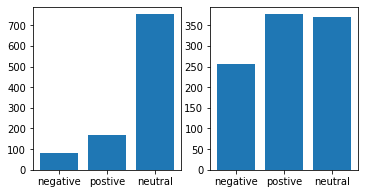

In [39]:
names = ['negative', 'postive', 'neutral']
TextBlob_values = [df_tweet.loc[df_tweet['TextBlob_Analysis']=='negative'].shape[0], 
                   df_tweet.loc[df_tweet['TextBlob_Analysis']=='positive'].shape[0],
                   df_tweet.loc[df_tweet['TextBlob_Analysis']=='neutral'].shape[0]]
Vader_values = [df_tweet.loc[df_tweet['Vader_analysis']=='negative'].shape[0], 
                   df_tweet.loc[df_tweet['Vader_analysis']=='positive'].shape[0],
                   df_tweet.loc[df_tweet['Vader_analysis']=='neutral'].shape[0]]
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, TextBlob_values)
plt.subplot(132)
plt.bar(names, Vader_values)

In [44]:
# store to csv file
#df = df_tweet.drop('raw_text', axis=1)
df_tweet.to_csv('data.csv', index= False)
